C:\Users\yeonn\AppData\Local\Temp\ipykernel_22340\352994181.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[['SDNN', 'LF', 'HF', 'LF/HF', 'SD1', 'SD2']] = data[['SDNN', 'LF', 'HF', 'LF/HF', 'SD1', 'SD2']].fillna(method='ffill')


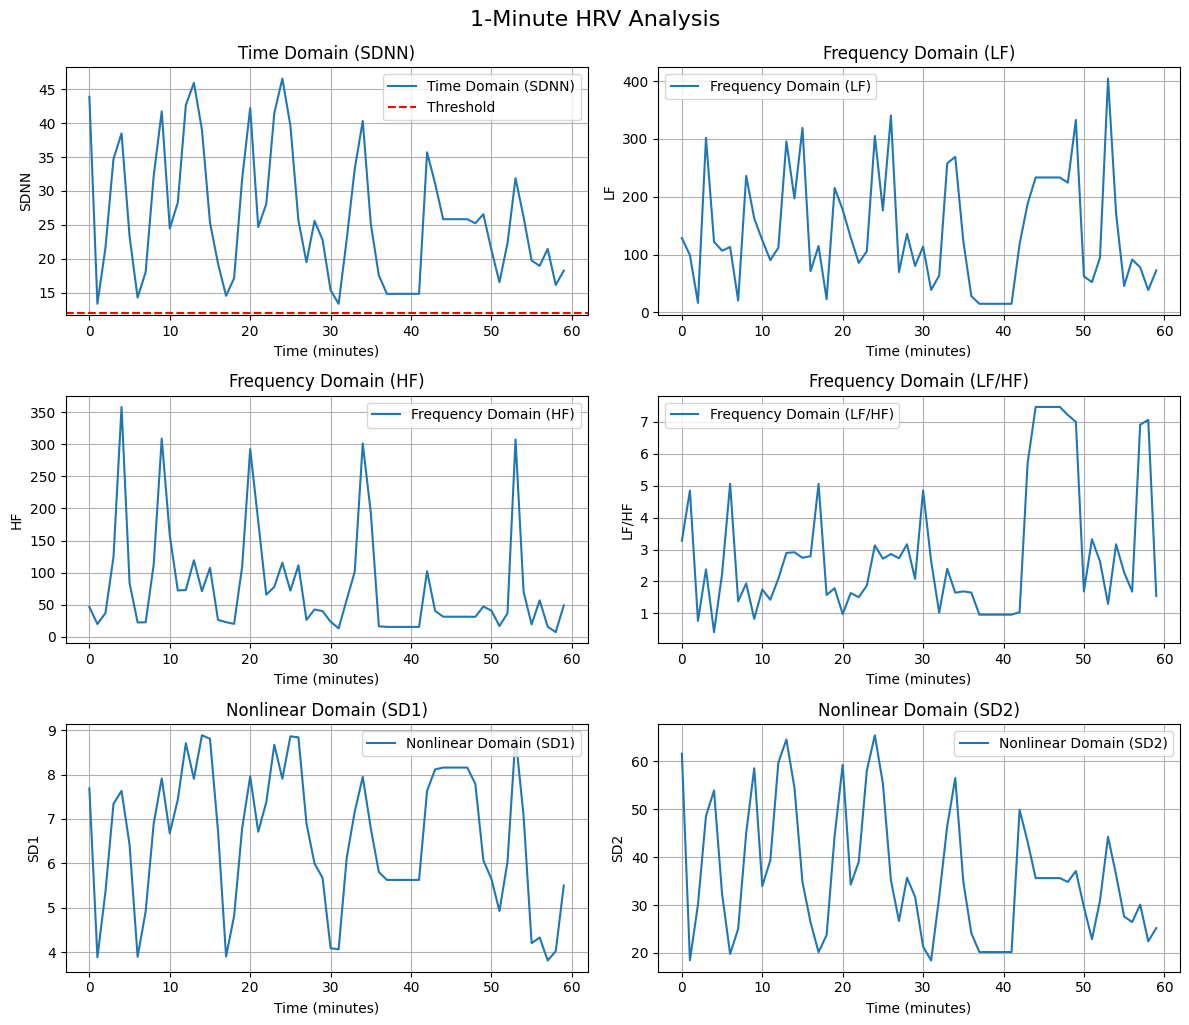

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV 파일 읽기
CSV_FILE_PATH = "hrv_results.csv"
data = pd.read_csv(CSV_FILE_PATH, header=0)

data['Timestamp'] = pd.to_datetime(data['StartTimestamp'])

# ErrorCount 처리: 36 이상인 경우 HRV 관련 값을 None으로 설정
data['ErrorCount'] = data['ErrorCount'].astype(float)  # ErrorCount를 float로 변환
data.loc[data['ErrorCount'] >= 36, ['SDNN', 'LF', 'HF', 'LF/HF', 'SD1', 'SD2']] = None


# None 값 대체 (이전 값 사용)
data[['SDNN', 'LF', 'HF', 'LF/HF', 'SD1', 'SD2']] = data[['SDNN', 'LF', 'HF', 'LF/HF', 'SD1', 'SD2']].fillna(method='ffill')


# 60개씩 그룹화 (1분 단위로 평균 계산)
group_size = 60
grouped_data = data.iloc[:, 4:].groupby(np.arange(len(data)) // group_size).mean()
grouped_data['Timestamp'] = data['Timestamp'][::group_size].reset_index(drop=True)



# 데이터 가져오기 (1분 단위)
time_minutes = [i for i in range(len(grouped_data))]
sdnn = grouped_data["SDNN"]
lf = grouped_data["LF"]
hf = grouped_data["HF"]
lf_hf = grouped_data["LF/HF"]
sd1 = grouped_data["SD1"]
sd2 = grouped_data["SD2"]

# 시각화 함수
def plot_hrv(time_minutes, values, title, ylabel, threshold=None):
    plt.plot(time_minutes, values, label=title)

    if threshold is not None:
        plt.axhline(y=threshold, color='r', linestyle='--', label="Threshold")

    plt.title(title)
    plt.xlabel("Time (minutes)")
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)

# 그래프 그리기
plt.figure(figsize=(12, 10))

# Time Domain HRV (SDNN)
plt.subplot(3, 2, 1)
plot_hrv(time_minutes, sdnn, "Time Domain (SDNN)", "SDNN", threshold=12)

# Frequency Domain HRV (LF)
plt.subplot(3, 2, 2)
plot_hrv(time_minutes, lf, "Frequency Domain (LF)", "LF")

# Frequency Domain HRV (HF)
plt.subplot(3, 2, 3)
plot_hrv(time_minutes, hf, "Frequency Domain (HF)", "HF")

# Frequency Domain HRV (LF/HF)
plt.subplot(3, 2, 4)
plot_hrv(time_minutes, lf_hf, "Frequency Domain (LF/HF)", "LF/HF")

# Nonlinear Domain HRV (SD1)
plt.subplot(3, 2, 5)
plot_hrv(time_minutes, sd1, "Nonlinear Domain (SD1)", "SD1")

# Nonlinear Domain HRV (SD2)
plt.subplot(3, 2, 6)
plot_hrv(time_minutes, sd2, "Nonlinear Domain (SD2)", "SD2")

plt.tight_layout()
plt.suptitle("1-Minute HRV Analysis", fontsize=16, y=1.02)
plt.show()
